<a href="https://colab.research.google.com/github/badhon2304/badhon2304/blob/Assignment/Badhon_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The presentation Link:
https://www.canva.com/design/DAGX7F04SsA/kKOUh7V0AcE9DA1BzHZHGg/edit?utm_content=DAGX7F04SsA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
#Fraud email

# Sentiment Analysis with Pre-trained Models from Hugging Face:

# Large Language Models Driven Projects in the Real World

### Sentiment Analysis with Pre-trained Models from Hugging Face

 Install Required Libraries
First, make sure you have the necessary libraries installed:

pip install transformers datasets

In [ ]:
! pip install transformers datasets

# Import Libraries and Load Dataset
You will load the dataset from Hugging Face, use a pre-trained model, and perform sentiment analysis.


In [ ]:
!pip install datasets
from transformers import pipeline, AutoTokenizer, AutoModelForMaskedLM
from datasets import load_dataset # Now datasets should be importable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the dataset
ds = load_dataset("tasksource/CLAIR_email_fraud")
df = pd.DataFrame(ds['train'])

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Show the first few rows of the dataset (optional, just for preview)
ds['train'][:5]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/329 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/2.45M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8980 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1926 [00:00<?, ? examples/s]

{'label': ['FRAUD', 'NOT_FRAUD', 'FRAUD', 'FRAUD', 'NOT_FRAUD'],
 'text': ['"Supply Quality China\'s EXCLUSIVE dimensions at Unbeatable Price.Dear Sir We are pleased to inform you as one of China\'s largest export & import sto=ne company-Wanlistone Group The Group its subsidiaries specialize in the q=uarrying processing and Sales of dimension stone slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen South of China which is the lar=gest export and import business portals in China where Wanlistone owns and =operates various natural stone deposits with 6000 square meters through th=e country. In addition to the quarries Wanlistone has a fully automated pro=cessing plant for the processing of the granite and marble and granite prod=ucts. Wanlistone supplies granite in raw block form granite and marble tile and= strips of varying dimension memorial materials and specialty products to =both the loca

In [34]:
# Example EDA
print(df.info())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8980 non-null   object
 1   text    8980 non-null   object
dtypes: object(2)
memory usage: 140.4+ KB
None
label
NOT_FRAUD    5066
FRAUD        3914
Name: count, dtype: int64


In [33]:
#missing_data
missing_data = df.isnull().sum()
missing_data

,0
label,0
text,0


# Load the Pre-trained Sentiment Analysis Model
We will use the Hugging Face pipeline to easily load a pre-trained sentiment analysis model.


In [21]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

# Preprocess the Text
If needed, you can preprocess the text (e.g., lowercasing, removing special characters) before feeding it into the model. This step may not be required if the dataset is already cleaned.


In [22]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove special characters
    text = re.sub(' +', ' ', text)  # Remove extra spaces
    return text

# Apply preprocessing to the dataset
ds['train'] = ds['train'].map(lambda x: {'text': preprocess_text(x['text'])})

# Display the first 5 rows of the updated dataset
ds['train'][:5]

Map:   0%|          | 0/8980 [00:00<?, ? examples/s]

{'label': ['FRAUD', 'NOT_FRAUD', 'FRAUD', 'FRAUD', 'NOT_FRAUD'],
 'text': ['supply quality chinas exclusive dimensions at unbeatable pricedear sir we are pleased to inform you as one of chinas largest export import stone companywanlistone group the group its subsidiaries specialize in the quarrying processing and sales of dimension stone slab and tiles and dimension stone products for the building materials sector and specialty markets2e the group operations are based in xiamen south of china which is the largest export and import business portals in china where wanlistone owns and operates various natural stone deposits with 6000 square meters through the country in addition to the quarries wanlistone has a fully automated processing plant for the processing of the granite and marble and granite products wanlistone supplies granite in raw block form granite and marble tile and strips of varying dimension memorial materials and specialty products to both the local but more specifically

# Perform Distilbert Analysis on the Dataset
Now, apply the sentiment analysis model to the dataset.

In [23]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [26]:
import numpy as np

sample_size = 5000
sample_indices = np.random.choice(len(ds['train']), size=sample_size, replace=False)
sample_ds = ds['train'].select(sample_indices)

In [27]:
import numpy as np
from transformers import pipeline

# ... (previous code for preparing sample_ds and sentiment_analyzer)

# Perform sentiment analysis on the sample
results = sentiment_analyzer(sample_ds["text"], truncation=True)  # Add truncation=True
results

[{'label': 'NEGATIVE', 'score': 0.8717196583747864},
 {'label': 'POSITIVE', 'score': 0.8750389218330383},
 {'label': 'NEGATIVE', 'score': 0.8417378664016724},
 {'label': 'POSITIVE', 'score': 0.7211235165596008},
 {'label': 'NEGATIVE', 'score': 0.9915106892585754},
 {'label': 'NEGATIVE', 'score': 0.973189115524292},
 {'label': 'NEGATIVE', 'score': 0.9982255101203918},
 {'label': 'NEGATIVE', 'score': 0.973894476890564},
 {'label': 'NEGATIVE', 'score': 0.5962015986442566},
 {'label': 'NEGATIVE', 'score': 0.9937601685523987},
 {'label': 'POSITIVE', 'score': 0.9997851252555847},
 {'label': 'POSITIVE', 'score': 0.8750389218330383},
 {'label': 'NEGATIVE', 'score': 0.9686436653137207},
 {'label': 'NEGATIVE', 'score': 0.9985515475273132},
 {'label': 'NEGATIVE', 'score': 0.9691990613937378},
 {'label': 'NEGATIVE', 'score': 0.9954019784927368},
 {'label': 'POSITIVE', 'score': 0.951947808265686},
 {'label': 'NEGATIVE', 'score': 0.9692423939704895},
 {'label': 'NEGATIVE', 'score': 0.974380373954773

Interpret the Results
The sentiment analysis model will return a list of predictions (e.g., positive/negative) for each sentence. Each prediction will look something like this:

[{'label': 'POSITIVE', 'score': 0.999}]
To interpret the results:

Label: The sentiment (e.g., POSITIVE or NEGATIVE).
Score: The confidence score (probability) of the model's prediction.

# Evaluate the Model Performance

You can evaluate the model’s performance by comparing its predictions to the actual labels (if available in the dataset). For example:

In [28]:
# Assuming 'label' column with 0 for Not_fraud and 1 for Fraud
true_labels = sample_ds['label']

# Map to 'Not_fraud' and 'Fraud' for better readability
true_labels_mapped = ['Fraud' if label == 1 else 'Not_Fraud' for label in true_labels]

# Predicted labels, ensure they are in the same format ('Fraud', 'Not_fraud')
predicted_labels = [result['label'] for result in results]
# Assuming your sentiment analyzer returns 'POSITIVE' for Fraud and 'NEGATIVE' for Not_fraud
predicted_labels = ['Fraud' if label == 'POSITIVE' else 'Not_Fraud' for label in predicted_labels]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
0,Not_Fraud,Not_Fraud,0.871720
1,Not_Fraud,Fraud,0.875039
2,Not_Fraud,Not_Fraud,0.841738
3,Not_Fraud,Fraud,0.721124
4,Not_Fraud,Not_Fraud,0.991511
...,...,...,...
4995,Not_Fraud,Not_Fraud,0.995621
4996,Not_Fraud,Fraud,0.616062
4997,Not_Fraud,Fraud,0.999679
4998,Not_Fraud,Fraud,0.636669


from matplotlib import pyplot as plt
comparison_df['Confidence Score'].plot(kind='hist', bins=20, title='Confidence Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Predicted Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Confidence Score'].plot(kind='line', figsize=(8, 4), title='Confidence Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Predicted Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Confidence Score', y='Predicted Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

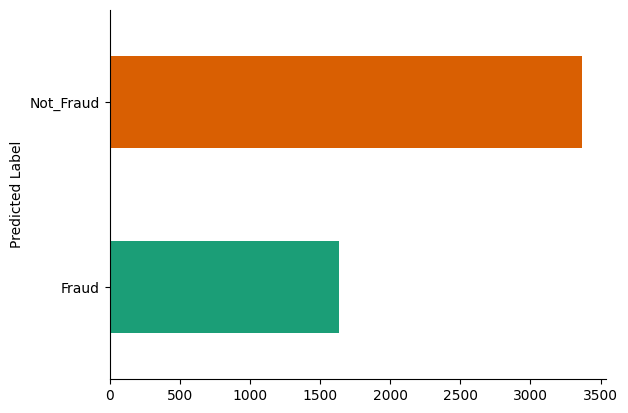

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Predicted Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

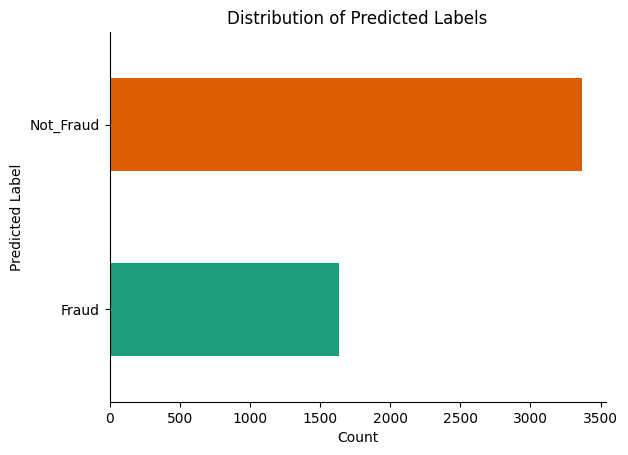

Predicted Label
Fraud        1632
Not_Fraud    3368
dtype: int64


In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported


# Assuming comparison_df is already defined as in your previous code

# Group by 'Predicted Label' and get the counts
predicted_label_counts = comparison_df.groupby('Predicted Label').size()

# Create the bar plot
predicted_label_counts.plot(kind='barh', color=sns.color_palette('Dark2')) # Use sns.color_palette instead of sns.palettes.mpl_palette
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Predicted Label')
plt.title('Distribution of Predicted Labels')

plt.show()  # Display the plot

# Print the predicted label counts
print(predicted_label_counts)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 67.36%'

In [31]:
# Generate the confusion matrix using the correct labels
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['Fraud', 'Not_Fraud'])  # Changed labels to match the actual values
conf_matrix

array([[   0,    0],
       [1632, 3368]])

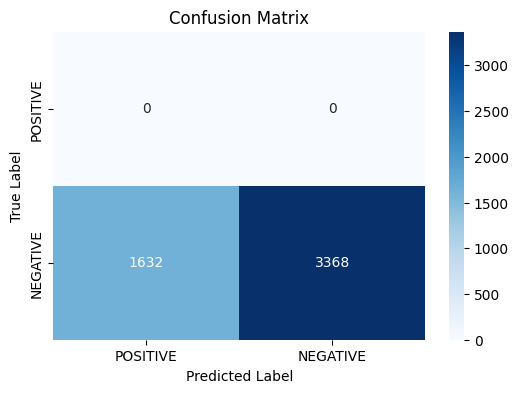

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Summary of Results:
Confusion Matrix:

True Negatives (TN): 0;
The model did not correctly classify any negative instances.

False Positives (FP): 0;
No negative instances were incorrectly classified as positive.

False Negatives (FN): 1632;
The model failed to classify 1632 positive instances, misclassifying them as negative.

True Positives (TP): 3368;
The model correctly classified 3368 positive instances.

Performance Metrics:
Accuracy: 67.36%

Accuracy: The overall accuracy of the model is 67.36%. This is calculated as (TP + TN) / (TP + TN + FP + FN) = (3368 + 0) / (3368 + 0 + 0 + 1632) = 0.6736. However, this confusion matrix highlights significant limitations in the model's performance.

No True Negatives:
The model was unable to correctly identify any negative instances, indicating a complete failure in distinguishing between fraud and legit emails.

High False Negatives:
A significant number of positive instances (fraud emails) were incorrectly classified as negative, which is critical in a fraud detection system.

